#Dataset1

In [ ]:
#importing the panads library
#importing the numpy library
#importing the matplot library
#importing the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#loading the data
df1 = pd.read_csv('NPRI Data for QC.xlsx - NPRI Data for review.csv')

In [ ]:
#colunmn in df1
df1.columns

Index(['NpriID', 'Company name', 'FacilityName', 'NPRI_Report_ReportYear',
       'Quantity', 'Cas', 'Detail_NPRI_SubstanceInfo_NameEn', 'Group',
       'Category', 'Latitude', 'Longitude', 'ProvinceEn',
       'Detail_UnitType_NameEn', 'NAICSPrimary', 'NAICSTitleEn',
       'Substance comments by category for 2022',
       'Substance comments for disposals and all media for 2022',
       'Number of employees'],
      dtype='object')

In [ ]:
# remove rows which have nan values in qauntity coulm

df1 = df1[df1['Quantity'].notnull()]


In [ ]:
df1['Detail_UnitType_NameEn'].unique()


array(['tonnes', 'kg', 'g TEQ', 'grams'], dtype=object)

In [ ]:
#converted all into kg
df1.loc[df1['Detail_UnitType_NameEn'] == 'tonnes',[ 'Quantity']] *= 1000
df1.loc[df1['Detail_UnitType_NameEn'] == 'g',[ 'Quantity']] /= 1000
df1.loc[df1['Detail_UnitType_NameEn'] == 'g TEQ',[ 'Quantity']] /= 1000

In [ ]:
#drop unit column

df1 = df1.drop('Detail_UnitType_NameEn', axis=1)

#Dataset 2

In [ ]:
df2 = pd.read_csv('NPRI_Data_2022_unclean.csv')
df2.columns

Index(['IssueID', 'ReportID', 'Priority', 'IssueType', 'ReportYear', 'NpriID',
       'CompanyName', 'FacilityName', 'NAICS', 'Category', 'Sub-Category',
       'Cas', 'SubstanceName', 'Units', 'CurrentYear', 'YearMinus1',
       'YearMinus2', 'YearMinus3', 'YearMinus4', 'PercentChange',
       'DifferenceChange', 'FourYearAvg', 'NAICSSubstanceAvg',
       'NumStandardDeviation', 'StandardDeviation', 'NAICSSubstanceCount',
       'NAICSSubstanceTotal', 'OverallSubstanceTotal', 'NumOfEmployees',
       'SubstanceComments'],
      dtype='object')

In [ ]:
#no of nan values in all columns
df2.isnull().sum()

IssueID                     0
ReportID                    0
Priority                    0
IssueType                   0
ReportYear                  0
NpriID                      0
CompanyName                 0
FacilityName                0
NAICS                       0
Category                    0
Sub-Category             3277
Cas                         0
SubstanceName               0
Units                       0
CurrentYear                 0
YearMinus1                108
YearMinus2               2664
YearMinus3               4156
YearMinus4               5181
PercentChange             110
DifferenceChange            0
FourYearAvg                77
NAICSSubstanceAvg           0
NumStandardDeviation      781
StandardDeviation           0
NAICSSubstanceCount         0
NAICSSubstanceTotal         0
OverallSubstanceTotal       0
NumOfEmployees              0
SubstanceComments        9963
dtype: int64

In [ ]:
df2 = df2.rename(columns={

'ReportYear':'NPRI_Report_ReportYear',
    'CompanyName': 'Company name',
    'SubstanceName': 'Detail_NPRI_SubstanceInfo_NameEn',
    'NAICS':'NAICSPrimary',
    'NumOfEmployees':'Number of employees',
    'CurrentYear':'Quantity'})

In [ ]:
df2

,IssueID,ReportID,Priority,IssueType,NPRI_Report_ReportYear,NpriID,Company name,FacilityName,NAICSPrimary,Category,...,DifferenceChange,FourYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceCount,NAICSSubstanceTotal,OverallSubstanceTotal,Number of employees,SubstanceComments
0,57733,335210,6,Trend,2022,11017,City of Kawartha Lakes,Lindsay WPCP,221320,Water,...,17.1000,24.167500,726.020055,-0.355612,1929.857872,101,73328.025600,81561.568318,5,Nature of activities results in annual variati...
1,57740,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,DisposalsTransfers,...,9.9803,15.924000,106.904767,-0.226340,379.694303,105,11225.000530,33430.126126,6,Nature of treating wastewater changes daily. T...
2,57745,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,...,-8.7418,2.762950,264.082095,-0.312018,846.184135,166,43837.627693,46252.286544,6,Quantities change year to year due to the natu...
3,57746,335213,6,Trend,2022,10979,City of Owen Sound,Owen Sound WPCP,221320,Water,...,-3.9187,1.305175,28.126980,-0.377584,74.431036,149,4190.920093,5418.433552,6,Nature of treating wastewater changes daily. t...
4,57765,335221,6,Trend,2022,24231,Heidelberg Materials Canada Limited,Glacier Quarry,212323,Air,...,3.9710,7.035500,25.332596,-0.220763,78.027725,118,2989.246371,493869.654799,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,133645,352761,6,Trend,2022,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,211110,VOC_NonStack,...,-0.1428,0.150000,0.275189,-0.243699,1.099672,2934,807.405055,124785.551954,2,NaN
14814,133648,352763,6,Trend,2022,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,Air,...,17.1057,21.152333,10.638948,0.361931,40.780596,5372,57152.430876,297092.019445,2,NaN
14815,133649,352763,6,Trend,2022,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,211110,VOC_NonStack,...,0.1411,0.024750,0.275189,-0.060099,1.099672,2934,807.405055,124785.551954,2,NaN
14816,133654,352766,6,Trend,2022,6066,Windsor Salt Ltd.,Pugwash Mine,212393,Air,...,18.9500,24.405000,41.775216,-0.144624,78.308042,8,334.201730,493869.654799,114,"Previously reported ""road dust"" to include pav..."


In [ ]:
df2['Units'].unique()

array(['tonnes', 'kg', 'g_teq_et', 'grams'], dtype=object)

In [ ]:
df2.loc[df2['Units'] == 'tonnes',[ 'Quantity','YearMinus1','YearMinus2','DifferenceChange','FourYearAvg']] *= 1000
df2.loc[df2['Units'] == 'grams',[ 'Quantity','YearMinus1','YearMinus2','DifferenceChange','FourYearAvg']] /= 1000
df2.loc[df2['Units'] == 'g_teq_et',[ 'Quantity','YearMinus1','YearMinus2','DifferenceChange','FourYearAvg']] /= 1000
df2.drop('Units', axis=1, inplace=True)

#Merging

In [ ]:
df = pd.concat([df1, df2], axis=0)

In [ ]:
df.columns

Index(['NpriID', 'Company name', 'FacilityName', 'NPRI_Report_ReportYear',
       'Quantity', 'Cas', 'Detail_NPRI_SubstanceInfo_NameEn', 'Group',
       'Category', 'Latitude', 'Longitude', 'ProvinceEn', 'NAICSPrimary',
       'NAICSTitleEn', 'Substance comments by category for 2022',
       'Substance comments for disposals and all media for 2022',
       'Number of employees', 'IssueID', 'ReportID', 'Priority', 'IssueType',
       'Sub-Category', 'YearMinus1', 'YearMinus2', 'YearMinus3', 'YearMinus4',
       'PercentChange', 'DifferenceChange', 'FourYearAvg', 'NAICSSubstanceAvg',
       'NumStandardDeviation', 'StandardDeviation', 'NAICSSubstanceCount',
       'NAICSSubstanceTotal', 'OverallSubstanceTotal', 'SubstanceComments'],
      dtype='object')

In [ ]:
# drop the columns 'Group' 'Latitude', 'Longitude', 'ProvinceEn' 'IssueID', 'ReportID', 'Priority', 'IssueType'as we cant fill the missing values in these

df = df.drop(columns=['Group', 'Latitude', 'Longitude', 'ProvinceEn', 'IssueID', 'ReportID', 'Priority', 'IssueType','Sub-Category','SubstanceComments', 'NAICSSubstanceAvg',
       'NumStandardDeviation', 'StandardDeviation', 'NAICSSubstanceCount',
       'NAICSSubstanceTotal', 'OverallSubstanceTotal', 'SubstanceComments','NAICSTitleEn',
       'Substance comments by category for 2022',
       'Substance comments for disposals and all media for 2022'])


In [ ]:
df.columns

Index(['NpriID', 'Company name', 'FacilityName', 'NPRI_Report_ReportYear',
       'Quantity', 'Cas', 'Detail_NPRI_SubstanceInfo_NameEn', 'Category',
       'NAICSPrimary', 'Number of employees', 'YearMinus1', 'YearMinus2',
       'YearMinus3', 'YearMinus4', 'PercentChange', 'DifferenceChange',
       'FourYearAvg'],
      dtype='object')

In [ ]:
df.isnull().sum()

NpriID                                   0
Company name                            10
FacilityName                           165
NPRI_Report_ReportYear                   0
Quantity                                 0
Cas                                      0
Detail_NPRI_SubstanceInfo_NameEn         0
Category                                 0
NAICSPrimary                             0
Number of employees                    578
YearMinus1                          536704
YearMinus2                          539260
YearMinus3                          540752
YearMinus4                          541777
PercentChange                       536706
DifferenceChange                    536596
FourYearAvg                         536673
dtype: int64

In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,YearMinus1,YearMinus2,YearMinus3,YearMinus4,PercentChange,DifferenceChange,FourYearAvg
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,22630.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,16670.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,15940.0,630-08-0,Carbon monoxide,Stack / Point,321999,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,13250.0,630-08-0,Carbon monoxide,Stack / Point,321999,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,12480.0,NA - M09,PM10 - Particulate Matter <= 10 Micrometers,Stack / Point,321999,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14813,24303,Obsidian Energy Ltd.,CDN OXY PEMBINA 16-3,2022,7.2,71-43-2,Benzene,VOC_NonStack,211110,2.0,150.0,NaN,NaN,NaN,-0.952000,-142.8,150.00000
14814,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,25398.7,NA - M16,Volatile Organic Compounds (Total),Air,211110,2.0,8293.0,12528.0,NaN,42.636,2.062667,17105.7,21152.33333
14815,24299,Obsidian Energy Ltd.,Amoco Pembina D-2 16-19,2022,209.1,71-43-2,Benzene,VOC_NonStack,211110,2.0,68.0,10.0,0.012,0.009,2.075000,141.1,24.75000
14816,6066,Windsor Salt Ltd.,Pugwash Mine,2022,30450.0,NA - M08,Total particulate matter,Air,212393,114.0,11500.0,35080.0,32.320,18.720,1.647826,18950.0,24405.00000


In [ ]:
# prompt: remove duplicate rows

df.drop_duplicates(inplace=True)


In [ ]:
df= df.sort_values(by='NPRI_Report_ReportYear')

# Shift quantities from 1 till 5
for lag in range(1, 5):
    column_name = f'YearMinus{lag}'
    # Shift the values and fill NaN values only
    shifted_values = df.groupby(['NpriID', 'NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn', 'Category'])['Quantity'].shift(lag)
    df[column_name] = df[column_name].fillna(shifted_values)

In [ ]:
for lag in range(1, 5):
    column_name = f'Year{lag}'
    df[column_name] = df.groupby(['NpriID', 'NAICSPrimary', 'Detail_NPRI_SubstanceInfo_NameEn', 'Category'])['NPRI_Report_ReportYear'].shift(lag)

In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,YearMinus2,YearMinus3,YearMinus4,PercentChange,DifferenceChange,FourYearAvg,Year1,Year2,Year3,Year4
440826,5871,St. Marys Cement Inc.,St. Marys Cement Plant,2014,54.531,NA - P/H,"PAHs, total unspeciated",Stack / Point,327310,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179432,27550,Encana Corporation,Deep Panuke,2014,68383.000,NA - M14,Total reduced sulphur (expressed as hydrogen s...,Stack / Point,211113,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523864,10010,Wesdome Gold Mines Ltd.,Eagle River Mill,2014,16500.000,NA - 06,Copper (and its compounds),Tailings Management,212220,220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377187,20156,Polaris Materials Corporation,Orca Sand and Gravel,2014,35909.000,NA - M08,Total particulate matter,Road dust,212323,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240820,10387,Hydro One Remote Communities Inc.,Sachigo Diesel Generating Station,2014,720.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Other Non-Point,221112,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,The Shaw Group Ltd.,"Shaw Resources Division, Eastern Embers Plant",2022,1879.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Road dust,321999,13.0,...,1800.000,1700.00,1300.0,NaN,NaN,NaN,2021.0,2020.0,2019.0,2018.0
213584,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3.240,68953-84-4,"1,4-Benzenediamine, N,N'-mixed phenyl and toly...",Stack / Point,326210,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,NaN
213587,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3070.000,108-10-1,Methyl isobutyl ketone,Stack / Point,326210,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,NaN
213466,4526,Goodrich Aerospace Canada Ltd.,Collins Aerospace- Oakville,2022,5.390,NA - 11,Nickel (and its compounds),Stack / Point,336410,1100.0,...,5.388,5.28,5.3,NaN,NaN,NaN,2021.0,2020.0,2019.0,2018.0


In [ ]:
#if year1 == NPRI_Report_ReportYear-1

df['Year1'] = df['NPRI_Report_ReportYear'] - df['Year1']
df['Year2'] = df['NPRI_Report_ReportYear'] - df['Year2']
df['Year3'] = df['NPRI_Report_ReportYear'] - df['Year3']
df['Year4'] = df['NPRI_Report_ReportYear'] - df['Year4']



In [ ]:
# mainly focusing on yearminus 1 and year minus 2

df.loc[(df['Year1'] == 0), 'YearMinus1']= np.nan
df.loc[(df['Year2'] == 0), 'YearMinus2']= np.nan
df.loc[(df['Year1'] == 2), 'YearMinus2']= df.loc[(df['Year1'] == 2), 'YearMinus1']
df.loc[(df['Year1'] == 2), 'YearMinus1']=np.nan
df.loc[(df['Year2'] == 1), 'YearMinus1']=df.loc[(df['Year1'] == 1), 'YearMinus2']
df.loc[(df['Year3'] == 1), 'YearMinus1']=df.loc[(df['Year3'] == 1), 'YearMinus3']
df.loc[(df['Year4'] == 1), 'YearMinus2']=df.loc[(df['Year4'] == 1), 'YearMinus4']
df.loc[(df['Year3'] == 2), 'YearMinus2']=df.loc[(df['Year3'] == 2), 'YearMinus3']
df.loc[(df['Year4'] == 2), 'YearMinus2']=df.loc[(df['Year4'] == 2), 'YearMinus4']


In [ ]:
# prompt: NO OF ROWS WHERE YEAR 1 IS 1 AND YEAR 2 IS 2

# Count the number of rows where 'Year1' is 1 and 'Year2' is 2
count = df[(df['Year1'] == 1) & (df['Year2'] == 2)].shape[0]

# Print the count
print(count)


270919


In [ ]:
# drop year1 yaer2 yaer 3 andyaer4 also the yaerminu3 ans year minu4

df.drop(columns=['Year1', 'Year2', 'Year3', 'Year4', 'YearMinus3', 'YearMinus4'], inplace=True)


In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,YearMinus1,YearMinus2,PercentChange,DifferenceChange,FourYearAvg
440826,5871,St. Marys Cement Inc.,St. Marys Cement Plant,2014,54.531,NA - P/H,"PAHs, total unspeciated",Stack / Point,327310,112.0,NaN,NaN,NaN,NaN,NaN
179432,27550,Encana Corporation,Deep Panuke,2014,68383.000,NA - M14,Total reduced sulphur (expressed as hydrogen s...,Stack / Point,211113,66.0,NaN,NaN,NaN,NaN,NaN
523864,10010,Wesdome Gold Mines Ltd.,Eagle River Mill,2014,16500.000,NA - 06,Copper (and its compounds),Tailings Management,212220,220.0,NaN,NaN,NaN,NaN,NaN
377187,20156,Polaris Materials Corporation,Orca Sand and Gravel,2014,35909.000,NA - M08,Total particulate matter,Road dust,212323,48.0,NaN,NaN,NaN,NaN,NaN
240820,10387,Hydro One Remote Communities Inc.,Sachigo Diesel Generating Station,2014,720.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Other Non-Point,221112,54.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,The Shaw Group Ltd.,"Shaw Resources Division, Eastern Embers Plant",2022,1879.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Road dust,321999,13.0,1852.00000,1800.000,NaN,NaN,NaN
213584,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3.240,68953-84-4,"1,4-Benzenediamine, N,N'-mixed phenyl and toly...",Stack / Point,326210,700.0,3.26276,NaN,NaN,NaN,NaN
213587,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3070.000,108-10-1,Methyl isobutyl ketone,Stack / Point,326210,700.0,3320.00000,NaN,NaN,NaN,NaN
213466,4526,Goodrich Aerospace Canada Ltd.,Collins Aerospace- Oakville,2022,5.390,NA - 11,Nickel (and its compounds),Stack / Point,336410,1100.0,5.39000,5.388,NaN,NaN,NaN


In [ ]:
#checking if the values are inputed successfully

# Filter the DataFrame to select rows where 'NpriID' is 28940 and 'Detail_NPRI_SubstanceInfo_NameEn' is 'Total particulate matter'
filtered_df = df[(df['NpriID'] == 28940) & (df['Detail_NPRI_SubstanceInfo_NameEn'] == 'Total particulate matter')]

# Print the filtered DataFrame
filtered_df


,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,YearMinus1,YearMinus2,PercentChange,DifferenceChange,FourYearAvg
305798,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2015,11209.0,NA - M08,Total particulate matter,Stack / Point,321999,160.0,NaN,NaN,NaN,NaN,NaN
305787,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2016,40900.0,NA - M08,Total particulate matter,Stack / Point,321999,165.0,11209.0,NaN,NaN,NaN,NaN
305786,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2017,42600.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,40900.0,11209.0,NaN,NaN,NaN
305785,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2018,48700.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,42600.0,40900.0,NaN,NaN,NaN
305790,28940,Les Planchers Mercier (Drummondville) Inc.,Les Planchers Mercier (Drummondville) Inc.,2019,22660.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,48700.0,42600.0,NaN,NaN,NaN
1,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2020,16670.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,22660.0,48700.0,NaN,NaN,NaN
0,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2021,22630.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,16670.0,22660.0,NaN,NaN,NaN
305844,28940,Les Planchers Mercier inc.,Les Planchers Mercier inc.,2022,23780.0,NA - M08,Total particulate matter,Stack / Point,321999,170.0,22630.0,16670.0,NaN,NaN,NaN


In [ ]:

df.isna().sum()

NpriID                                   0
Company name                            10
FacilityName                           165
NPRI_Report_ReportYear                   0
Quantity                                 0
Cas                                      0
Detail_NPRI_SubstanceInfo_NameEn         0
Category                                 0
NAICSPrimary                             0
Number of employees                    578
YearMinus1                          152833
YearMinus2                          238759
PercentChange                       530622
DifferenceChange                    530512
FourYearAvg                         530589
dtype: int64

In [ ]:

print(df[df['YearMinus1'].isna()].shape)
print(df[df['YearMinus2'].isna()].shape)


(152833, 15)
(238759, 15)


In [ ]:
# fill the nan values in year minus 1 by taking average of quantity and year minus2

df['YearMinus1'] = df['YearMinus1'].fillna((df['Quantity'] + df['YearMinus2']) / 2)
df['YearMinus2'] = df['YearMinus2'].fillna((df['Quantity'] + df['YearMinus1']) / 2)

In [ ]:
print(df[df['YearMinus1'].isna()].shape)
print(df[df['YearMinus2'].isna()].shape)


(141781, 15)
(141781, 15)


In [ ]:
df.isna().sum()


NpriID                                   0
Company name                            10
FacilityName                           165
NPRI_Report_ReportYear                   0
Quantity                                 0
Cas                                      0
Detail_NPRI_SubstanceInfo_NameEn         0
Category                                 0
NAICSPrimary                             0
Number of employees                    578
YearMinus1                          141781
YearMinus2                          141781
PercentChange                       530622
DifferenceChange                    530512
FourYearAvg                         530589
dtype: int64

In [ ]:
# fill the nan values in facility by company anme

df['FacilityName'] = df['FacilityName'].fillna(df['Company name'])


In [ ]:
#same for compamny anme
df['Company name'] = df['Company name'].fillna(df['FacilityName'])


In [ ]:
#fill the number of employees by average

df['Number of employees'] = df['Number of employees'].fillna(df['Number of employees'].mean())


In [ ]:
# columwise bfill f ill on quntity year minus1 and year miuns2

df[['Quantity', 'YearMinus1', 'YearMinus2']] = df[['Quantity', 'YearMinus1', 'YearMinus2']].fillna(method='bfill')


In [ ]:
# prompt: rename FourYearAvg as ThreeYearAvg and apply formula

# Rename the 'FourYearAvg' column to 'ThreeYearAvg'
df = df.rename(columns={'FourYearAvg': 'ThreeYearAvg'})

# Replace NaN values with zeros
df_filled = df.fillna(0)

# Calculate the count of non-NaN values in each column
non_nan_counts = df_filled[['Quantity', 'YearMinus1', 'YearMinus2']].count(axis=1)

# Calculate the three-year average
df['ThreeYearAvg'] = (df_filled['Quantity'] + df_filled['YearMinus1'] + df_filled['YearMinus2']) / non_nan_counts.replace(0, np.nan)


In [ ]:


# Calculate the difference between the current year's quantity and the previous year's quantity
df['DifferenceChange'] = df['Quantity'] - df['YearMinus1']

# Calculate the percentage change between the current year's quantity and the previous year's quantity
df['PercentChange'] = (df['DifferenceChange'] / df['YearMinus1']) * 100



In [ ]:
# prompt: round the vakues in diffrenece change to nearest number and percent change to nearet 2 decimal places

# Round 'DifferenceChange' to the nearest integer
df['DifferenceChange'] = df['DifferenceChange'].round(0)

# Round 'PercentChange' to two decimal places
df['PercentChange'] = df['PercentChange'].round(2)


In [ ]:
# prompt: if diffrence change ==0 then percentage chnage =0

df.loc[df['DifferenceChange'] == 0, 'PercentChange'] = 0


In [ ]:
# prompt: if year minus 1 is 0 then percent change =0

df.loc[df['YearMinus1'] == 0, 'PercentChange'] = 0


In [ ]:
print("Number of NaN values in the DataFrame:", df.isna().sum().sum())

Number of NaN values in the DataFrame: 0


In [ ]:
print("Number of NaN values in each column:")
print(df.isna().sum())

Number of NaN values in each column:
NpriID                              0
Company name                        0
FacilityName                        0
NPRI_Report_ReportYear              0
Quantity                            0
Cas                                 0
Detail_NPRI_SubstanceInfo_NameEn    0
Category                            0
NAICSPrimary                        0
Number of employees                 0
YearMinus1                          0
YearMinus2                          0
PercentChange                       0
DifferenceChange                    0
ThreeYearAvg                        0
dtype: int64


In [ ]:
df

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg
440826,5871,St. Marys Cement Inc.,St. Marys Cement Plant,2014,54.531,NA - P/H,"PAHs, total unspeciated",Stack / Point,327310,112.0,35.00000,32.00000,55.80,20.0,40.510333
179432,27550,Encana Corporation,Deep Panuke,2014,68383.000,NA - M14,Total reduced sulphur (expressed as hydrogen s...,Stack / Point,211113,66.0,35.00000,32.00000,195280.00,68348.0,22816.666667
523864,10010,Wesdome Gold Mines Ltd.,Eagle River Mill,2014,16500.000,NA - 06,Copper (and its compounds),Tailings Management,212220,220.0,35.00000,32.00000,47042.86,16465.0,5522.333333
377187,20156,Polaris Materials Corporation,Orca Sand and Gravel,2014,35909.000,NA - M08,Total particulate matter,Road dust,212323,48.0,35.00000,32.00000,102497.14,35874.0,11992.000000
240820,10387,Hydro One Remote Communities Inc.,Sachigo Diesel Generating Station,2014,720.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Other Non-Point,221112,54.0,35.00000,32.00000,1957.14,685.0,262.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,The Shaw Group Ltd.,"Shaw Resources Division, Eastern Embers Plant",2022,1879.000,NA - M10,PM2.5 - Particulate Matter <= 2.5 Micrometers,Road dust,321999,13.0,1852.00000,1800.00000,1.46,27.0,1843.666667
213584,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3.240,68953-84-4,"1,4-Benzenediamine, N,N'-mixed phenyl and toly...",Stack / Point,326210,700.0,3.26276,3.25138,0.00,-0.0,3.251380
213587,1322,Goodyear Canada Inc.,Goodyear Canada Inc.,2022,3070.000,108-10-1,Methyl isobutyl ketone,Stack / Point,326210,700.0,3320.00000,3195.00000,-7.53,-250.0,3195.000000
213466,4526,Goodrich Aerospace Canada Ltd.,Collins Aerospace- Oakville,2022,5.390,NA - 11,Nickel (and its compounds),Stack / Point,336410,1100.0,5.39000,5.38800,0.00,0.0,5.389333


In [ ]:
print(df['NPRI_Report_ReportYear'].unique())

[2014 2015 2016 2017 2018 2019 2020 2021 2022]


#Encoding

as if we do it by get dummies it gives true false value

In [ ]:
# Assuming df is your DataFrame containing the data
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

# Create dummy variables manually
for year in years:
    df[f'Year_{year}'] = (df['NPRI_Report_ReportYear'] == year).astype(int)




In [ ]:
df.dtypes

NpriID                                int64
Company name                         object
FacilityName                         object
NPRI_Report_ReportYear                int64
Quantity                            float64
Cas                                  object
Detail_NPRI_SubstanceInfo_NameEn     object
Category                             object
NAICSPrimary                          int64
Number of employees                 float64
YearMinus1                          float64
YearMinus2                          float64
PercentChange                       float64
DifferenceChange                    float64
ThreeYearAvg                        float64
Year_2014                             int64
Year_2015                             int64
Year_2016                             int64
Year_2017                             int64
Year_2018                             int64
Year_2019                             int64
Year_2020                             int64
Year_2021                       

In [ ]:
# Label Encoding for categorical columns
categorical_columns = [ 'Company name', 'FacilityName','Cas' ,'Detail_NPRI_SubstanceInfo_NameEn', 'Category', ]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
df


,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,ThreeYearAvg,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
440826,5871,3194,13103,2014,54.531,258,194,28,327310,112.0,...,40.510333,1,0,0,0,0,0,0,0,0
179432,27550,1184,4230,2014,68383.000,256,239,28,211113,66.0,...,22816.666667,1,0,0,0,0,0,0,0,0
523864,10010,3727,4671,2014,16500.000,215,91,33,212220,220.0,...,5522.333333,1,0,0,0,0,0,0,0,0
377187,20156,2681,9819,2014,35909.000,253,237,26,212323,48.0,...,11992.000000,1,0,0,0,0,0,0,0,0
240820,10387,1653,12457,2014,720.000,255,196,15,221112,54.0,...,262.333333,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,3430,12747,2022,1879.000,255,196,26,321999,13.0,...,1843.666667,0,0,0,0,0,0,0,0,1
213584,1322,1449,5940,2022,3.240,129,10,28,326210,700.0,...,3.251380,0,0,0,0,0,0,0,0,1
213587,1322,1449,5940,2022,3070.000,18,168,28,326210,700.0,...,3195.000000,0,0,0,0,0,0,0,0,1
213466,4526,1448,3817,2022,5.390,220,182,28,336410,1100.0,...,5.389333,0,0,0,0,0,0,0,0,1


#Splitting Data

In [ ]:
# Filter the training data (years 2015-2021)
train_data = df[(df['Year_2015'] == 1) | (df['Year_2016'] == 1) | (df['Year_2017'] == 1) |
                (df['Year_2018'] == 1) | (df['Year_2019'] == 1) | (df['Year_2020'] == 1) |
                (df['Year_2021'] == 1)]


# Filter the testing data (year 2022)
test_data = df[df['Year_2022'] == 1]

In [ ]:
test_data

,NpriID,Company name,FacilityName,NPRI_Report_ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,ThreeYearAvg,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
9785,11602,1550,4754,2022,10382.000,223,251,5,335315,445.0,...,14124.500000,0,0,0,0,0,0,0,0,1
9762,728,2147,9280,2022,4.896,24,202,0,325210,60.0,...,3.778667,0,0,0,0,0,0,0,0,1
82732,23874,673,9756,2022,619.050,253,237,28,211110,1.0,...,451.750000,0,0,0,0,0,0,0,0,1
514226,15429,3605,12263,2022,425.060,254,195,28,211110,1.0,...,142.031667,0,0,0,0,0,0,0,0,1
8041,2173,2742,7339,2022,0.709,212,71,38,322122,400.0,...,0.581333,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478549,8017,3430,12747,2022,1879.000,255,196,26,321999,13.0,...,1843.666667,0,0,0,0,0,0,0,0,1
213584,1322,1449,5940,2022,3.240,129,10,28,326210,700.0,...,3.251380,0,0,0,0,0,0,0,0,1
213587,1322,1449,5940,2022,3070.000,18,168,28,326210,700.0,...,3195.000000,0,0,0,0,0,0,0,0,1
213466,4526,1448,3817,2022,5.390,220,182,28,336410,1100.0,...,5.389333,0,0,0,0,0,0,0,0,1


In [ ]:
# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split

# Split the train data into train and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

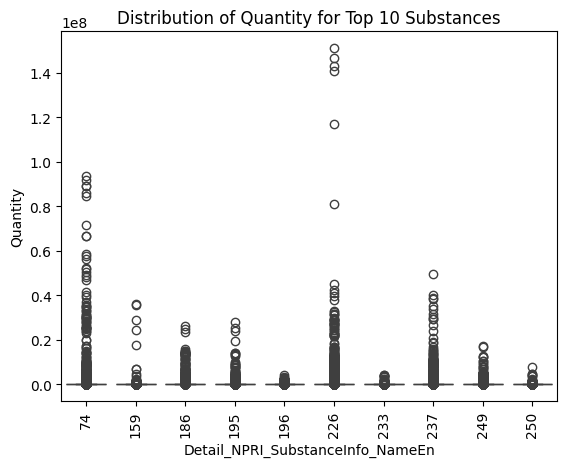

In [ ]:
# Get the top 10 substances by 'Quantity'
top_10_substances = train_data['Detail_NPRI_SubstanceInfo_NameEn'].value_counts().head(10).index

# Create a boxplot of the 'Quantity' column grouped by 'Detail_NPRI_SubstanceInfo_NameEn' for the top 10 substances
sns.boxplot(data=train_data[train_data['Detail_NPRI_SubstanceInfo_NameEn'].isin(top_10_substances)], x='Detail_NPRI_SubstanceInfo_NameEn', y='Quantity')
plt.xticks(rotation=90)
plt.title('Distribution of Quantity for Top 10 Substances')
plt.show()


##Handling outliers

In [ ]:
#handle the outliers in the quantity column by grouping by Detail_NPRI_SubstanceInfo_NameEn in all train_data ,val_data and test data

# Handle outliers in the 'Quantity' column by grouping by 'Detail_NPRI_SubstanceInfo_NameEn'
for d in [train_data, val_data, test_data]:
    # Calculate the lower and upper bounds for each group
    bounds = d.groupby('Detail_NPRI_SubstanceInfo_NameEn')['Quantity'].agg(['mean', 'std'])
    bounds['lower'] = bounds['mean'] - (2 * bounds['std'])
    bounds['upper'] = bounds['mean'] + (2 * bounds['std'])

    # Replace outliers with the mean of the corresponding group
    for group, bounds in bounds.iterrows():
        d.loc[(d['Detail_NPRI_SubstanceInfo_NameEn'] == group) & (d['Quantity'] < bounds['lower']), 'Quantity'] = bounds['mean']
        d.loc[(d['Detail_NPRI_SubstanceInfo_NameEn'] == group) & (d['Quantity'] > bounds['upper']), 'Quantity'] = bounds['mean']


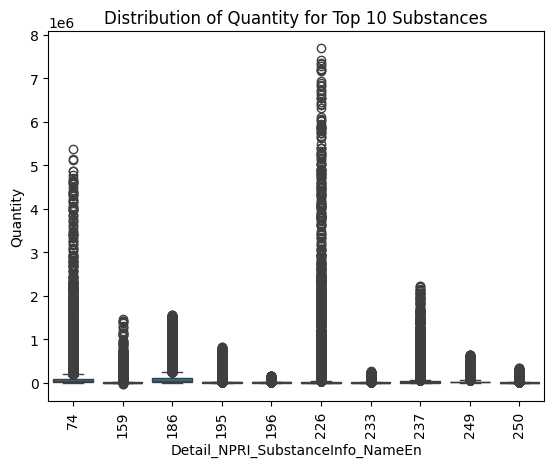

In [ ]:
# Get the top 10 substances by 'Quantity'
top_10_substances = train_data['Detail_NPRI_SubstanceInfo_NameEn'].value_counts().head(10).index

# Create a boxplot of the 'Quantity' column grouped by 'Detail_NPRI_SubstanceInfo_NameEn' for the top 10 substances
sns.boxplot(data=train_data[train_data['Detail_NPRI_SubstanceInfo_NameEn'].isin(top_10_substances)], x='Detail_NPRI_SubstanceInfo_NameEn', y='Quantity')
plt.xticks(rotation=90)
plt.title('Distribution of Quantity for Top 10 Substances')
plt.show()

In [ ]:
if type(train_data) != pd.core.frame.DataFrame:
    train_data = pd.DataFrame(train_data)

if type(test_data) != pd.core.frame.DataFrame:
    test_data = pd.DataFrame(test_data)

if type(val_data) != pd.core.frame.DataFrame:
    val_data = pd.DataFrame(val_data)

##Feature engineering

In [ ]:
# prompt: rename report year as report year in all datas

train_data = train_data.rename(columns={"NPRI_Report_ReportYear": "ReportYear"})
val_data = val_data.rename(columns={"NPRI_Report_ReportYear": "ReportYear"})
test_data = test_data.rename(columns={"NPRI_Report_ReportYear": "ReportYear"})


In [ ]:
# Feature engineering for train_data_copy
# For training data
train_data['ReportYear'] = pd.to_datetime(train_data['ReportYear']).dt.year
train_data['NAICSSubstanceAvg'] = train_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform('mean')
train_data['NumStandardDeviation'] = train_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform('std')
train_data['StandardDeviation'] = train_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform(lambda x: np.std(x))
train_data['NAICSSubstanceTotal'] = train_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform('sum')

overall_substance_total_train = train_data.groupby('ReportYear')['Quantity'].sum()
train_data['OverallSubstanceTotal'] = train_data['ReportYear'].map(overall_substance_total_train)

# For test data
test_data['ReportYear'] = pd.to_datetime(test_data['ReportYear']).dt.year
test_data['NAICSSubstanceAvg'] = test_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform('mean')
test_data['NumStandardDeviation'] = test_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform('std')
test_data['StandardDeviation'] = test_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform(lambda x: np.std(x))
test_data['NAICSSubstanceTotal'] = test_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform('sum')

overall_substance_total_test = test_data.groupby('ReportYear')['Quantity'].sum()
test_data['OverallSubstanceTotal'] = test_data['ReportYear'].map(overall_substance_total_test)

# For validation data
val_data['ReportYear'] = pd.to_datetime(val_data['ReportYear']).dt.year
val_data['NAICSSubstanceAvg'] = val_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform('mean')
val_data['NumStandardDeviation'] = val_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform('std')
val_data['StandardDeviation'] = val_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform(lambda x: np.std(x))
val_data['NAICSSubstanceTotal'] = val_data.groupby(['NAICSPrimary', 'ReportYear'])['Quantity'].transform('sum')

overall_substance_total_val = val_data.groupby('ReportYear')['Quantity'].sum()
val_data['OverallSubstanceTotal'] = val_data['ReportYear'].map(overall_substance_total_val)



In [ ]:
# prompt: NumStandardDeviation as StandardDeviation - NumStandardDeviation

train_data['NumStandardDeviation'] = train_data['StandardDeviation'] - train_data['NumStandardDeviation']
test_data['NumStandardDeviation'] = test_data['StandardDeviation'] - test_data['NumStandardDeviation']
val_data['NumStandardDeviation'] = val_data['StandardDeviation'] - val_data['NumStandardDeviation']


In [ ]:
train_data

,NpriID,Company name,FacilityName,ReportYear,Quantity,Cas,Detail_NPRI_SubstanceInfo_NameEn,Category,NAICSPrimary,Number of employees,...,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,OverallSubstanceTotal
132090,4948,847,3720,1970,11010.0000,124,165,17,562210,25.0,...,0,0,0,1,0,21724.061000,-5.496207,107915.267052,2.132868e+08,1.192942e+10
307006,11073,2055,8153,1970,17190.0000,215,91,21,332710,561.0,...,1,0,0,0,0,7275.097366,-29.935356,13545.732104,1.651447e+06,1.192942e+10
433005,1185,3112,12865,1970,10.8000,226,144,4,322112,290.0,...,0,0,1,0,0,75987.808673,-17.304585,300623.910740,6.601061e+08,1.192942e+10
256428,10225,1673,6483,1970,19.0000,0,125,1,412110,4.0,...,0,0,0,0,0,5459.312518,-1.691620,35866.567969,5.787963e+07,1.192942e+10
128208,5884,840,9611,1970,383000.0000,225,183,4,221320,9.0,...,0,1,0,0,0,39652.468613,-6.260254,139418.997552,4.415699e+08,1.192942e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482657,7941,3455,1569,1970,3078.3000,255,196,28,321212,450.0,...,0,1,0,0,0,38481.684712,-59.460931,85415.616554,2.766833e+07,1.192942e+10
238246,409,1647,8198,1970,6.8000,203,5,22,211110,108.0,...,0,0,0,1,0,26688.278280,-0.870010,136924.354952,2.100154e+09,1.192942e+10
304852,4377,2017,8104,1970,0.0000,173,167,28,332329,161.0,...,0,0,0,0,0,5798.084430,-64.065199,27067.508802,1.229194e+06,1.192942e+10
499254,2984,3523,6343,1970,350.3559,81,131,11,331110,862.0,...,0,0,0,0,0,54460.737156,-20.471151,292542.988817,3.891764e+08,1.192942e+10


In [ ]:
train_data.columns

Index(['NpriID', 'Company name', 'FacilityName', 'ReportYear', 'Quantity',
       'Cas', 'Detail_NPRI_SubstanceInfo_NameEn', 'Category', 'NAICSPrimary',
       'Number of employees', 'YearMinus1', 'YearMinus2', 'PercentChange',
       'DifferenceChange', 'ThreeYearAvg', 'Year_2014', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020',
       'Year_2021', 'Year_2022', 'NAICSSubstanceAvg', 'NumStandardDeviation',
       'StandardDeviation', 'NAICSSubstanceTotal', 'OverallSubstanceTotal'],
      dtype='object')

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Columns to scale
columns_to_scale = ['YearMinus1', 'YearMinus2', 'PercentChange', 'DifferenceChange', 'ThreeYearAvg', 'NAICSSubstanceAvg', 'NumStandardDeviation', 'StandardDeviation', 'NAICSSubstanceTotal', 'OverallSubstanceTotal']

# Perform scaling on train_data
scaled_train_data = scaler.fit_transform(train_data[columns_to_scale])
scaled_train_data_df = pd.DataFrame(scaled_train_data, columns=columns_to_scale)

# Reset the index of train_data
train_data_reset_index = train_data.reset_index(drop=True)

# Concatenate with the rest of the columns
train_data_scaled = pd.concat([scaled_train_data_df, train_data_reset_index.drop(columns=columns_to_scale)], axis=1)

# Perform scaling on val_data
scaled_val_data = scaler.transform(val_data[columns_to_scale])
scaled_val_data_df = pd.DataFrame(scaled_val_data, columns=columns_to_scale)

# Reset the index of val_data
val_data_reset_index = val_data.reset_index(drop=True)

# Concatenate with the rest of the columns
val_data_scaled = pd.concat([scaled_val_data_df, val_data_reset_index.drop(columns=columns_to_scale)], axis=1)

# Perform scaling on test_data
scaled_test_data = scaler.transform(test_data[columns_to_scale])
scaled_test_data_df = pd.DataFrame(scaled_test_data, columns=columns_to_scale)

# Reset the index of test_data
test_data_reset_index = test_data.reset_index(drop=True)

# Concatenate with the rest of the columns
test_data_scaled = pd.concat([scaled_test_data_df, test_data_reset_index.drop(columns=columns_to_scale)], axis=1)


In [ ]:
train_data_scaled

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,OverallSubstanceTotal,...,Number of employees,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
0,-0.054862,-0.056537,-0.005355,0.013601,-0.060366,-0.545706,0.263750,-0.441417,-0.549984,0.000008,...,25.0,0,0,0,0,0,0,0,1,0
1,-0.041071,-0.051639,-0.005355,-0.000974,-0.051699,-1.100447,0.013001,-1.192357,-0.806309,0.000008,...,561.0,0,0,0,0,1,0,0,0,0
2,-0.062002,-0.063648,-0.005355,0.014311,-0.068414,1.537648,0.142595,1.092051,-0.008814,0.000008,...,290.0,0,0,0,0,0,0,1,0,0
3,-0.061999,-0.063643,-0.005355,0.014313,-0.068408,-1.170161,0.302786,-1.014741,-0.738208,0.000008,...,4.0,0,1,0,0,0,0,0,0,0
4,0.121789,0.175773,-0.005355,0.083549,0.183495,0.142621,0.255911,-0.190728,-0.273497,0.000008,...,9.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331942,-0.059042,-0.060666,-0.005355,0.012709,-0.065415,0.097671,-0.289936,-0.620457,-0.774798,0.000008,...,450.0,0,0,0,0,0,1,0,0,0
331943,-0.061771,-0.063654,-0.005355,0.013972,-0.068327,-0.355115,0.311216,-0.210579,1.735317,0.000008,...,108.0,0,0,0,0,0,0,0,1,0
331944,-0.062008,-0.063654,-0.005355,0.014311,-0.068421,-1.157154,-0.337177,-1.084759,-0.806820,0.000008,...,161.0,0,0,0,1,0,0,0,0,0
331945,-0.061721,-0.063278,-0.005355,0.014201,-0.068084,0.711157,0.110105,1.027748,-0.336954,0.000008,...,862.0,0,0,0,1,0,0,0,0,0


In [ ]:
train_data=train_data_scaled
test_data=test_data_scaled
val_data=val_data_scaled

In [ ]:
# Convert boolean columns to numeric (0 for False, 1 for True)
train_data.loc[:, 'Year_2015':'Year_2022'] = train_data.loc[:, 'Year_2015':'Year_2022'].astype(int)
val_data.loc[:, 'Year_2015':'Year_2022'] = val_data.loc[:, 'Year_2015':'Year_2022'].astype(int)

In [ ]:
train_data

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,OverallSubstanceTotal,...,Number of employees,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
0,-0.054862,-0.056537,-0.005355,0.013601,-0.060366,-0.545706,0.263750,-0.441417,-0.549984,0.000008,...,25.0,0,0,0,0,0,0,0,1,0
1,-0.041071,-0.051639,-0.005355,-0.000974,-0.051699,-1.100447,0.013001,-1.192357,-0.806309,0.000008,...,561.0,0,0,0,0,1,0,0,0,0
2,-0.062002,-0.063648,-0.005355,0.014311,-0.068414,1.537648,0.142595,1.092051,-0.008814,0.000008,...,290.0,0,0,0,0,0,0,1,0,0
3,-0.061999,-0.063643,-0.005355,0.014313,-0.068408,-1.170161,0.302786,-1.014741,-0.738208,0.000008,...,4.0,0,1,0,0,0,0,0,0,0
4,0.121789,0.175773,-0.005355,0.083549,0.183495,0.142621,0.255911,-0.190728,-0.273497,0.000008,...,9.0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331942,-0.059042,-0.060666,-0.005355,0.012709,-0.065415,0.097671,-0.289936,-0.620457,-0.774798,0.000008,...,450.0,0,0,0,0,0,1,0,0,0
331943,-0.061771,-0.063654,-0.005355,0.013972,-0.068327,-0.355115,0.311216,-0.210579,1.735317,0.000008,...,108.0,0,0,0,0,0,0,0,1,0
331944,-0.062008,-0.063654,-0.005355,0.014311,-0.068421,-1.157154,-0.337177,-1.084759,-0.806820,0.000008,...,161.0,0,0,0,1,0,0,0,0,0
331945,-0.061721,-0.063278,-0.005355,0.014201,-0.068084,0.711157,0.110105,1.027748,-0.336954,0.000008,...,862.0,0,0,0,1,0,0,0,0,0


##Cross Validation


In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X_train = train_data.drop(columns=['Quantity'])
y_train = train_data['Quantity']

X_validation = val_data.drop(columns=['Quantity'])
y_validation = val_data['Quantity']

# Define the machine learning models
random_forest_model = RandomForestRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the range of fold sizes you want to test
fold_size=5

# Random Forest
random_forest_scores = cross_val_score(random_forest_model, X_train, y_train, cv=fold_size, scoring='neg_mean_squared_error')
rf_mse = -random_forest_scores.mean()
print('Mean Squared Error:', rf_mse)




KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Define the machine learning models
random_forest_model = RandomForestRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the range of fold sizes you want to test
fold_size = 5

# Random Forest
random_forest_scores = cross_val_score(random_forest_model, X_validation, y_validation, cv=fold_size, scoring='neg_mean_squared_error')
rf_mse = -random_forest_scores.mean()
print('Random Forest Mean Squared Error:', rf_mse)

# Decision Tree
decision_tree_scores = cross_val_score(decision_tree_model, X_validation, y_validation, cv=fold_size, scoring='neg_mean_squared_error')
dt_mse = -decision_tree_scores.mean()
print('Decision Tree Mean Squared Error:', dt_mse)


Random Forest Mean Squared Error: 21778259584.4737
Decision Tree Mean Squared Error: 51356205450.14356


#Feature Selection

##Based on correlation

In [ ]:
corr = train_data.corr()
corr.head()

,YearMinus1,YearMinus2,PercentChange,DifferenceChange,ThreeYearAvg,NAICSSubstanceAvg,NumStandardDeviation,StandardDeviation,NAICSSubstanceTotal,OverallSubstanceTotal,...,Number of employees,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022
YearMinus1,1.000000,0.878061,-0.000332,-0.603787,0.947295,0.055015,-0.013589,0.057833,-0.001596,NaN,...,0.022783,NaN,0.002186,0.001275,0.005314,0.000588,-0.005666,0.000289,-0.003036,NaN
YearMinus2,0.878061,1.000000,-0.000341,-0.410290,0.950346,0.055950,-0.014101,0.058400,-0.001861,NaN,...,0.020338,NaN,0.002100,0.002133,0.002816,0.001488,-0.003943,-0.000665,-0.003185,NaN
PercentChange,-0.000332,-0.000341,1.000000,0.001581,0.000037,-0.000712,0.000277,-0.000757,0.006336,NaN,...,-0.001339,NaN,-0.001739,-0.001943,0.004095,0.001006,-0.002319,-0.001588,0.002555,NaN
DifferenceChange,-0.603787,-0.410290,0.001581,1.000000,-0.356205,0.002816,-0.002702,0.002494,-0.012075,NaN,...,0.000465,NaN,0.002149,0.003096,-0.004230,-0.005667,0.005278,-0.003185,0.002656,NaN
ThreeYearAvg,0.947295,0.950346,0.000037,-0.356205,1.000000,0.064670,-0.016618,0.067700,-0.005185,NaN,...,0.025524,NaN,0.003070,0.002628,0.004062,-0.000502,-0.004480,-0.000881,-0.002851,NaN


<Axes: >

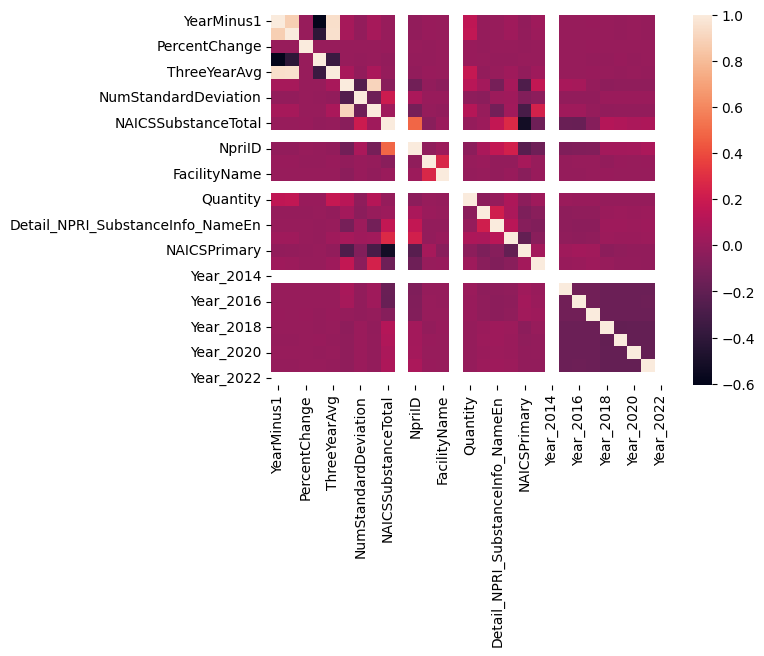

In [ ]:
sns.heatmap(corr)

In [ ]:
#removing columns that have correaltion greater than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
selected_columns = train_data.columns[columns]
selected_columns.shape

(27,)

In [ ]:
selected_columns

Index(['YearMinus1', 'YearMinus2', 'PercentChange', 'DifferenceChange',
       'NAICSSubstanceAvg', 'NumStandardDeviation', 'NAICSSubstanceTotal',
       'OverallSubstanceTotal', 'NpriID', 'Company name', 'FacilityName',
       'ReportYear', 'Quantity', 'Cas', 'Detail_NPRI_SubstanceInfo_NameEn',
       'Category', 'NAICSPrimary', 'Number of employees', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Year_2020', 'Year_2021', 'Year_2022'],
      dtype='object')

In [ ]:
# use selected columns for all datas

train_data1 = train_data[selected_columns]
val_data1 = val_data[selected_columns]


In [ ]:
# prompt: split val data 1 to

X_validation = val_data1.drop(columns=['Quantity'])
y_validation = val_data1['Quantity']


In [ ]:
# performing regressor models with selected columns

# Split the data into features and target
X_train = train_data1.drop('Quantity', axis=1)
y_train = train_data1['Quantity']

# Initialize the models
random_forest_model = RandomForestRegressor()
decision_tree_model = DecisionTreeRegressor()

# Fit the models
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)




In [ ]:
# Make predictions on the validation data
rf_predictions = random_forest_model.predict(X_validation)
dt_predictions = decision_tree_model.predict(X_validation)

# Calculate the mean squared error
rf_mse = mean_squared_error(y_validation, rf_predictions)
dt_mse = mean_squared_error(y_validation, dt_predictions)

# Print the results
print('Random Forest Mean Squared Error:', rf_mse)
print('Decision Tree Mean Squared Error:', dt_mse)

##Based on p value

In [ ]:
# select the columns based on p value

import statsmodels.api as sm
X = train_data.drop('Quantity', axis=1)
y = train_data['Quantity']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
p_values = model.pvalues
selected_columns = p_values[p_values < 0.05].index
train_data = train_data[selected_columns]
test_data = test_data[selected_columns]
val_data = val_data[selected_columns]
